## IMDB 예제

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
max_features=10000
maxlen = 20

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\MOON\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\MOON\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

In [4]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

In [8]:
model = Sequential()
model.add(Embedding(max_features+1, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80008     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,169
Trainable params: 80,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6810 - acc: 0.5852 - val_loss: 0.6058 - val_acc: 0.7014
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5594 - acc: 0.7467 - val_loss: 0.5229 - val_acc: 0.7294
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4621 - acc: 0.7918 - val_loss: 0.5009 - val_acc: 0.7444
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4189 - acc: 0.8117 - val_loss: 0.4932 - val_acc: 0.7548
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3931 - acc: 0.8254 - val_loss: 0.4934 - val_acc: 0.7592
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3665 - acc: 0.8374 - val_loss: 0.4991 - val_acc: 0.7536
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3511 - acc: 0.8482 - val_loss: 0.5019 - val_acc: 0.7588
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

# Umich-SI650 감성분석 예제

In [11]:
ftrain = open('data/umich-sentiment-train.txt', 'rb')
labels = []
texts = []
for line in ftrain:
    label, sentence = line.decode('utf8').strip().split('\t')
    labels.append(int(label))
    texts.append(sentence)

In [12]:
texts

['The Da Vinci Code book is just awesome.',
 "this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.",
 'i liked the Da Vinci Code a lot.',
 'i liked the Da Vinci Code a lot.',
 "I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.",
 "that's not even an exaggeration ) and at midnight we went to Wal-Mart to buy the Da Vinci Code, which is amazing of course.",
 'I loved the Da Vinci Code, but now I want something better and different!..',
 'i thought da vinci code was great, same with kite runner.',
 'The Da Vinci Code is actually a good movie...',
 'I thought the Da Vinci Code was a pretty good book.',
 'The Da Vinci Code is one of the most beautiful movies ive ever seen.',
 'The Da Vinci Code is an * amazing * book, do not get me wrong.',
 'then I turn on the light and the radio and enjoy my Da Vinci Code.',
 'The Da Vinci Code was REALLY good.',
 'i love da vinci code....',
 'i loved da vinci co

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [14]:
max_words = 2000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
seq = tokenizer.texts_to_sequences(texts)

In [15]:
seq

[[2, 7, 6, 8, 88, 12, 40, 15],
 [56,
  14,
  2,
  102,
  952,
  953,
  340,
  120,
  97,
  37,
  303,
  301,
  18,
  954,
  3,
  7,
  6,
  8,
  121,
  104,
  955,
  327,
  56],
 [1, 108, 2, 7, 6, 8, 13, 309],
 [1, 108, 2, 7, 6, 8, 13, 309],
 [1, 108, 2, 7, 6, 8, 37, 21, 956, 367, 957, 19, 627, 71, 467],
 [398,
  60,
  303,
  54,
  958,
  3,
  98,
  959,
  55,
  96,
  19,
  960,
  961,
  19,
  628,
  2,
  7,
  6,
  8,
  51,
  12,
  321,
  31,
  378],
 [1, 48, 2, 7, 6, 8, 37, 310, 1, 49, 379, 122, 3, 468],
 [1, 106, 7, 6, 8, 14, 126, 145, 39, 962, 963],
 [2, 7, 6, 8, 12, 328, 13, 92, 20],
 [1, 106, 2, 7, 6, 8, 14, 13, 298, 92, 88],
 [2, 7, 6, 8, 12, 41, 31, 2, 107, 91, 33, 629, 120, 127],
 [2, 7, 6, 8, 12, 54, 321, 88, 322, 60, 311, 57, 380],
 [99, 1, 630, 95, 2, 964, 3, 2, 965, 3, 354, 29, 7, 6, 8],
 [2, 7, 6, 8, 14, 32, 92],
 [1, 11, 7, 6, 8],
 [1, 48, 7, 6, 8],
 [19, 355, 2, 7, 6, 8, 3, 13, 91, 966],
 [2, 7, 6, 8, 12, 54, 15, 88],
 [333, 12, 1, 368, 2, 7, 6, 8],
 [314, 7, 6, 8, 967, 3

In [16]:
word2idx = tokenizer.word_index
idx2word = {j:i for i, j in word2idx.items()}

In [17]:
maxlen=40
data = pad_sequences(seq, maxlen=maxlen)

In [18]:
data

array([[  0,   0,   0, ...,  12,  40,  15],
       [  0,   0,   0, ..., 955, 327,  56],
       [  0,   0,   0, ...,   8,  13, 309],
       ...,
       [  0,   0,   0, ...,  20,   9,  10],
       [  0,   0,   0, ...,  13,  70,  20],
       [  0,   0,   0, ...,  13,  78,  20]])

In [19]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = np.asarray(labels)
labels = labels[indices]

In [20]:
embedding_idx = {}
f = open('data/glove.6b.50d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_idx[word] = coefs
f.close()

In [21]:
embed_dim = 50

embed_matrix = np.zeros((max_words, embed_dim))
for word, i in word2idx.items():
    if i < max_words:
        embed_vector = embedding_idx.get(word)
        if embed_vector is not None:
            embed_matrix[i] = embed_vector

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embed_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 50)            100000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 164,065
Trainable params: 164,065
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers[0].set_weights([embed_matrix])
model.layers[0].trainable=False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 50)            100000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 164,065
Trainable params: 64,065
Non-trainable params: 100,000
_________________________________________________________________


In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
178/178 [==============================] - 1s 5ms/step - loss: 0.3106 - acc: 0.8767 - val_loss: 0.1122 - val_acc: 0.9598
Epoch 2/10
178/178 [==============================] - 1s 4ms/step - loss: 0.0797 - acc: 0.9691 - val_loss: 0.0918 - val_acc: 0.9661
Epoch 3/10
178/178 [==============================] - 1s 4ms/step - loss: 0.0387 - acc: 0.9886 - val_loss: 0.0862 - val_acc: 0.9697
Epoch 4/10
178/178 [==============================] - 1s 4ms/step - loss: 0.0221 - acc: 0.9949 - val_loss: 0.1104 - val_acc: 0.9661
Epoch 5/10
178/178 [==============================] - 1s 4ms/step - loss: 0.0158 - acc: 0.9953 - val_loss: 0.1099 - val_acc: 0.9683
Epoch 6/10
178/178 [==============================] - 1s 4ms/step - loss: 0.0073 - acc: 0.9990 - val_loss: 0.1162 - val_acc: 0.9697
Epoch 7/10
178/178 [==============================] - 1s 4ms/step - loss: 0.0051 - acc: 0.9994 - val_loss: 0.1373 - val_acc: 0.9683
Epoch 8/10
178/178 [==============================] - 1s 4ms/step - loss: 0.

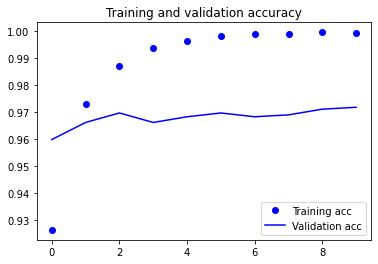

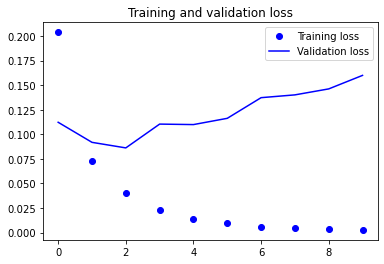

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()